# ARIMA Models in Python

## Chapter 1 - ARMA Models

### Exploration

In this exercise you will kick off your journey to become an ARIMA master by loading and plotting a time series. You probably do this all the time, but this is just a refresher.

You will be exploring a dataset of monthly US candy production between 1972 and 2018.

Specifically, you are plotting the industrial production index IPG3113N. This is total amount of sugar and confectionery products produced in the USA per month, as a percentage of the January 2012 production. So 120 would be 120% of the January 2012 industrial production.

Check out how this quantity has changed over time and how it changes throughout the year.

In [2]:
# Import modules
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np

1. Load in the candy production time series 'candy_production.csv' using pandas, set the index to the'date'column, parse the dates and assign it to the variable candy.

In [3]:
# Load in the time series
candy = pd.read_csv('candy_production.csv', 
            index_col='observation_date',
            parse_dates=True)


2. Plot the time series onto the axis ax using the DataFrame's .plot() method. Then show the plot.

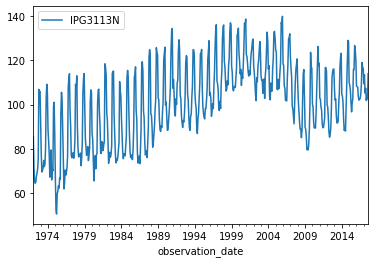

In [4]:
# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

### Train-test splits

In this exercise you are going to take the candy production dataset and split it into a train and a test set. Like you understood in the video exercise, the reason to do this is so that you can test the quality of your model fit when you are done.

The candy production data set has been loaded in for you as candy already and pyplot has been loaded in as plt.

1. Split the time series into train and test sets by slicing with datetime indexes. Take the train set as everything up to the end of 2006 and the test set as everything from the start of 2007.

In [5]:
# Train data - all data up to the end of 2006
candy_train = candy.loc[:'2006']
# Test data - all data from 2007 onwards
candy_test = candy.loc['2007':]

2. Make a pyplot axes using the subplots() function. Use the DataFrame's .plot() method to plot the train and test sets on the axis ax.

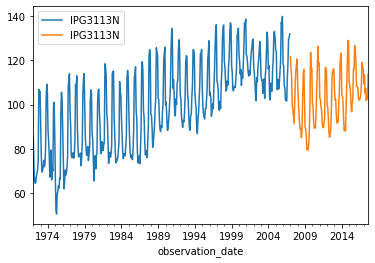

In [6]:
# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

### Is it stationary

Identifying whether a time series is stationary or non-stationary is very important. If it is stationary you can use ARMA models to predict the next values of the time series. If it is non-stationary then you cannot use ARMA models, however, as you will see in the next lesson, you can often transform non-stationary time series to stationary ones.

In this exercise you will examine some stock and earthquake data sets in order to identify which are ready for ARMA modeling, and which will need further work to make them stationary.

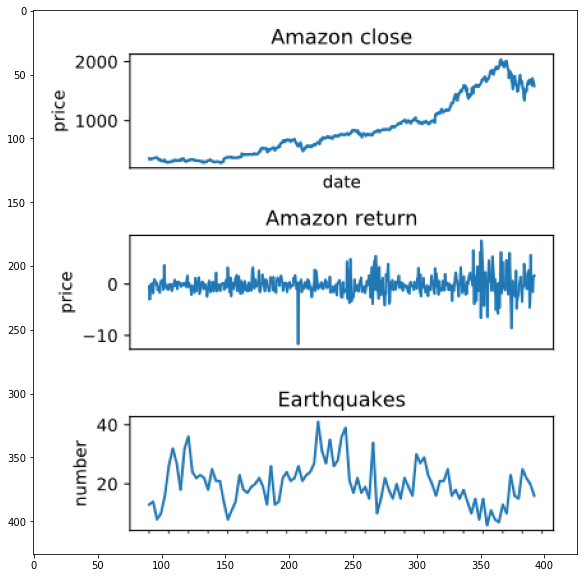

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('Is%20it%20stationary.png')
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(img)
plt.show()

Question 1
The top plot shown is a time series of Amazon stock close price.

Is the stock close price stationary?

Possible Answers
1. No, because in the top plot, the dynamics change with time.
2. No, because in the top plot, the variance changes with time.
3. No, because the top plot has a trend.
4. Yes, the top plot appears to be stationary.



Question 2
The middle plot shown is a time series of the return (percentage increase of price per day) of Amazon stock.

Is the stock return stationary?

Possible Answers

1. No, because in the middle plot, the dynamics change with time.
2. No, because in the middle plot, the variance changes with time.
3. No, because the middle plot has a trend.
4. Yes, the middle plot appears to be stationary.



Question 3
The bottom plot is a time series of the number of major earthquakes per year (earthquakes of magnitude 7.0 or greater).

Is the number of major earthquakes per year stationary?

Possible Answers
1. No, because in the bottom plot, the dynamics change with time.
2. No, because in the bottom plot, the variance changes with time.
3. No, because the bottom plot has a trend.
4. Yes, the bottom plot appears to be stationary.



### Making time series stationary

Augmented Dicky-Fuller
In this exercise you will run the augmented Dicky-Fuller test on the earthquakes time series to test for stationarity. You plotted this time series in the last exercise. It looked like it could be stationary, but earthquakes are very damaging. If you want to make predictions about them you better be sure.

Remember that if it were not stationary this would mean that the number of earthquakes per year has a trend and is changing. This would be terrible news if it is trending upwards, as it means more damage. It would also be terrible news if it were trending downwards, it might suggest the core of our planet is changing and this could have lots of knock on effects for us!

The earthquakes DataFrame has been loaded in for you as earthquake.

In [8]:
# Load in the time series
earthquake= pd.read_csv('earthquake.csv',
                        index_col='date',
                        parse_dates=True)
earthquake

,earthquakes_per_year
date,
1900-01-01,13.0
1901-01-01,14.0
1902-01-01,8.0
1903-01-01,10.0
1904-01-01,16.0
...,...
1994-01-01,15.0
1995-01-01,25.0
1996-01-01,22.0


1. Import the augmented Dicky-Fuller function adfuller() from statsmodels.

In [9]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

2. Run the adfuller() function on the 'earthquakes_per_year' column of the earthquake DataFrame and assign the result to result.

In [10]:
# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result[0])

# Print p-value
print(result[1])

# Print critical values
print(result[4]) 

-3.1831922511917816
0.020978425256003668
{'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}


In [11]:
result

(-3.1831922511917816,
 0.020978425256003668,
 2,
 96,
 {'1%': -3.5003788874873405,
  '5%': -2.8921519665075235,
  '10%': -2.5830997960069446},
 549.0681467660734)

3. Explain the results

**0th element is test statistic (-3.18) :** <br/>
More negativemeansmore likely to be stationary

**1st element is p-value: (0.02)** <br/>
If p-value is small→ reject null hypothesis. Reject non-stationary.

**4th element is the critical test statistics** <br/>

A critical point for a function is a place where the function might have a relative extremum. (Also called a "local" , extreme or extreme value)

Pour les franchises : En analyse à plusieurs variables, un point critique d'une fonction de plusieurs variables, à valeurs numériques, est un point d'annulation de son gradient

### Taking the difference

In this exercise, you will to prepare a time series of the population of a city for modeling. If you could predict the growth rate of a city then it would be possible to plan and build the infrastructure that the city will need later, thus future-proofing public spending. In this case the time series is fictitious but its perfect to practice on.

You will test for stationarity by eye and use the Augmented Dicky-Fuller test, and take the difference to make the dataset stationary.

The DataFrame of the time series has been loaded in for you as city and the adfuller() function has been imported.

In [13]:
# Load in the time series
city= pd.read_csv('city.csv',
                        index_col='date',
                        parse_dates=True)

city

,city_population
date,
1969-09-30,1.000000
1970-03-31,0.960285
1970-09-30,0.957167
1971-03-31,0.946928
1971-09-30,0.987741
...,...
2017-03-31,2.441387
2017-09-30,2.475257
2018-03-31,2.550677


1. Run the augmented Dicky-Fuller on the 'city_population' column of city.

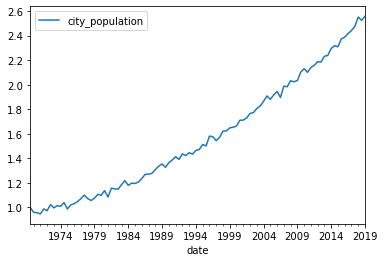

In [14]:
# Run the ADF test on the time series
result = adfuller(city['city_population'])

# Plot the time series
fig, ax = plt.subplots()
city.plot(ax=ax)
plt.show()

2. Print the test statistic and the p-value.

In [15]:
# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 5.297691059291824
p-value: 1.0


3. Take the first difference of city dropping the NaN values. Assign this to city_stationary and run the test again.

In [16]:
city.diff().isnull()

#Diff function : out[i] = arr[i+1] – arr[i] 

,city_population
date,
1969-09-30,True
1970-03-31,False
1970-09-30,False
1971-03-31,False
1971-09-30,False
...,...
2017-03-31,False
2017-09-30,False
2018-03-31,False


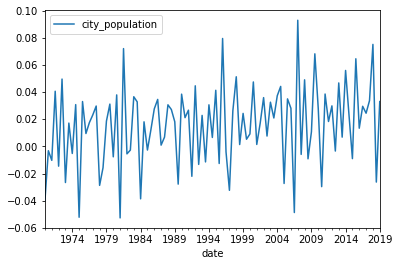

ADF Statistic: -0.8146290333502461
p-value: 0.8147870860776121


In [17]:
# Calculate the first difference of the time series
city_stationary = city.diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

4. Take the second difference of city, by applying the .diff() method twice and drop the NaN values.

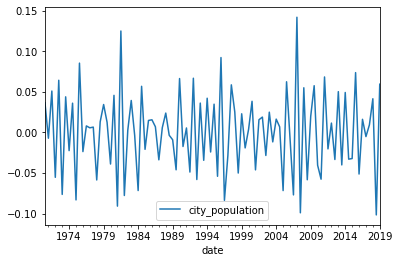

ADF Statistic: -6.433640708195988
p-value: 1.6734979822049115e-08


In [18]:
# Calculate the first difference of the time series
city_stationary = city.diff().diff().dropna()

# Run ADF test on the differenced time series
result = adfuller(city_stationary['city_population'])

# Plot the differenced time series
fig, ax = plt.subplots()
city_stationary.plot(ax=ax)
plt.show()

# Print the test statistic and the p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

### Other tranforms

Differencing should be the first transform you try to make a time series stationary. But sometimes it isn't the best option.

A classic way of transforming stock time series is the log-return of the series. This is calculated as follows:

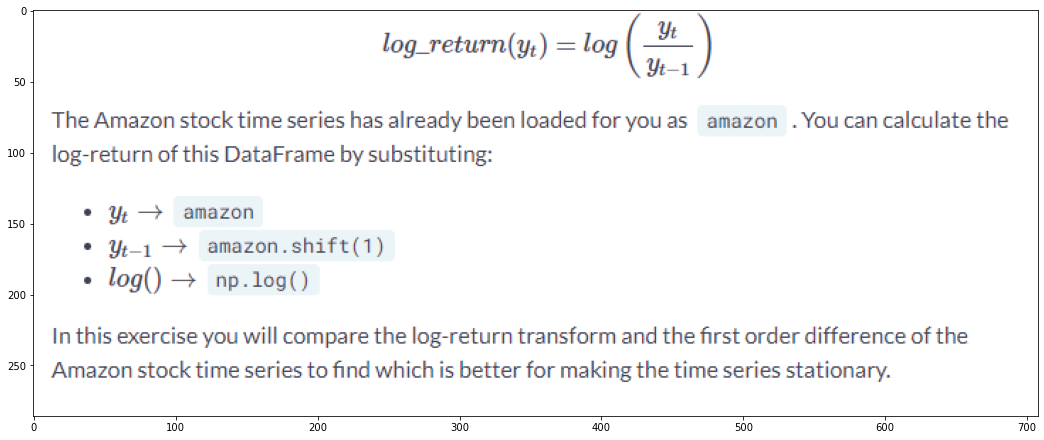

In [75]:
img = mpimg.imread('Other_transforms.png')
fig, ax = plt.subplots(figsize=(18, 10))
ax.imshow(img)
plt.show()

In [21]:
# Load in the time series
amazon= pd.read_csv('amazon.csv',
                        index_col='date',
                        parse_dates=True)


(-7.203579488811219, 2.3312717254875353e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


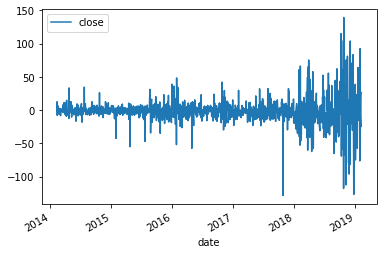

(-34.915748536059674, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


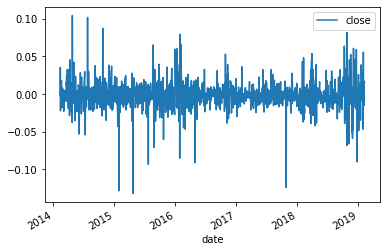

In [84]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Plot the differenced time series
fig, ax = plt.subplots()
amazon_diff.plot(ax=ax)
plt.show()

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

# Plot the differenced time series
fig, ax = plt.subplots()
amazon_log.plot(ax=ax)
plt.show()

### Model order

When fitting and working with AR, MA and ARMA models it is very important to understand the model order. You will need to pick the model order when fitting. Picking this correctly will give you a better fitting model which makes better predictions. So in this section you will practice working with model order.

Question

If you were to use these in the arma_generate_sample() function what would be the order of the data?

Possible Answers

1. ARMA(2,1)
2. ARMA(3,2)
3. ARMA(1,2)
4. ARMA(2,3)

In [85]:
ar_coefs = [1, 0.4, -0.1]
ma_coefs= [1, 0.2]

Question

Print ar_coefs and ma_coefs which are available in the console. If you were to use these in the arma_generate_sample() function what would the lag-1 AR coefficient?

Possible Answers

1. 0.4
2. 0.2
3. -0.4
4. -0.2

Question

Which of these models is equivalent to an AR(1) model?

Possible Answers

1. ARMA(1,1)
2. ARMA(1,0)
3. MA(1)
4. ARMA(0,1)

In [88]:
import statsmodels.api as sm

np.random.seed(12345)
arparams = np.array([.75, -.25])
maparams = np.array([.65, .35])
ar = np.r_[1, -arparams] # add zero-lag and negate
ma = np.r_[1, maparams] # add zero-lag
y = sm.tsa.arma_generate_sample(ar, ma, 250)
model = sm.tsa.ARMA(y, (2, 2)).fit(trend='nc', disp=0)
model.params

array([ 0.79044188, -0.23140632,  0.70072913,  0.40608028])

### Generating ARMA data
In this exercise you will generate 100 days worth of AR/MA/ARMA data. Remember that in the real world applications, this data could be changes in Google stock prices, the energy requirements of New York City, or the number of cases of flu.

You can use the arma_generate_sample() function available in your workspace to generate time series using different AR and MA coefficients.

Remember for any model ARMA(p,q):

The list ar_coefs has the form [1, -a_1, -a_2, ..., -a_p].

The list ma_coefs has the form [1, m_1, m_2, ..., m_q],

where a_i are the lag-i AR coefficients and m_j are the lag-j MA coefficients.

1. Set ar_coefs and ma_coefs for an MA(1) model with MA lag-1 coefficient of -0.7. Generate a time series of 100 values.

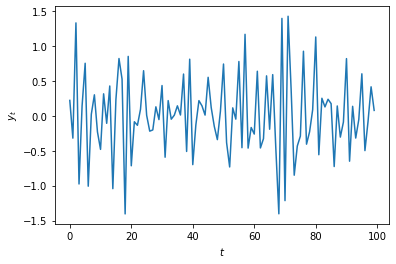

In [23]:
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(5)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

2. Set the coefficients for an AR(2) model with AR lag-1 and lag-2 coefficients of 0.3 and 0.2 respectively

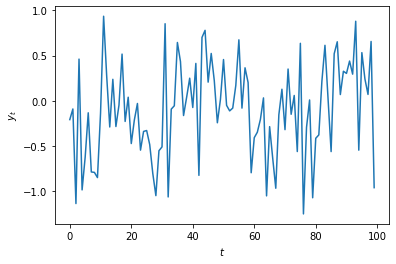

In [24]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

3. Set the coefficients for a model with form yt=−0.2y(t−1)+0.3ϵ(t−1)+0.4ϵ(t−2)+ϵt.

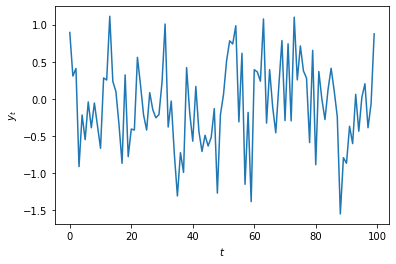

In [126]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2, ]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, scale=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

### Fitting Prelude
Great, you understand model order! Understanding the order is important when it comes to fitting models. You will always need to select the order of model you fit to your data, no matter what that data is.

In this exercise you will do some basic fitting. Fitting models is the next key step towards making predictions. We'll go into this more in the next chapter but let's get a head start.

Some example ARMA(1,1) data have been created and are available in your environment as y. This data could represent the amount of traffic congestion. You could use forecasts of this to suggest the efficient routes for drivers.

1. Import the ARMA model class from the statsmodels.tsa.arima_model submodule.
2. Create a model object, passing it the time series y and the model order (1,1). Assign this to the variable model.
3. Use the model's .fit() method to fit to the data.

In [127]:
# Import the ARMA model
from statsmodels.tsa.arima_model import ARMA

# Instantiate the model
model = ARMA(y, order=(1,1))

# Fit the model
results = model.fit()